# System Crisis Prediction
**This project uses the 'Systemic Crisis, Banking Crisis, inflation Crisis In Africa' dataset that was provided by Kaggle.**

- Dataset description : This dataset focuses on the Banking, Debt, Financial, Inflation and Systemic Crises that occurred, from 1860 to 2014, in 13 African countries, including: Algeria, Angola, Central African Republic, Ivory Coast, Egypt, Kenya, Mauritius, Morocco, Nigeria, South Africa, Tunisia, Zambia and Zimbabwe. The ML model objective is to predict the likelihood of a Systemic crisis emergence given a set of indicators like the annual inflation rates.

 ➡️ Dataset link

https://i.imgur.com/3XzFz3x.jpg


**Instructions**

1. Import you data and perform basic data exploration phase
2. Display general information about the dataset
3. Create a pandas profiling reports to gain insights into the dataset
4. Handle Missing and corrupted values
5. Remove duplicates, if they exist
6. Handle outliers, if they exist
7. Encode categorical features
8. Select your target variable and the features
9. Split your dataset to training and test sets
10. Based on your data exploration phase select a ML classification algorithm and train it on the training set
11. Assess your model performance on the test set using relevant evaluation metrics
12. Discuss with your cohort alternative ways to improve your model performance

In [2]:
# importing necessary libraries

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [4]:
# Loading the dataset
df = pd.read_csv("African_crises_dataset.csv")

In [6]:
pd.set_option('display.max_columns', None)

In [8]:
# Overview of the dataset
df.head()

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [10]:
# More information about the dataset
df.shape

(1059, 14)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_number                   1059 non-null   int64  
 1   country_code                     1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [14]:
# Summary statistics
df.describe(include ='all')

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
count,1059.000000,1059,1059,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000,1059
unique,NaN,13,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,EGY,Egypt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no_crisis
freq,NaN,155,155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,965
mean,35.613787,NaN,NaN,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367,NaN
std,23.692402,NaN,NaN,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765,NaN
min,1.000000,NaN,NaN,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000,NaN
25%,15.000000,NaN,NaN,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000,NaN
50%,38.000000,NaN,NaN,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000,NaN
75%,56.000000,NaN,NaN,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000,NaN


In [16]:
#Checking for missing values and duplicates
df.isnull().sum()

country_number                     0
country_code                       0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

***There are no missing values in this dataset***

In [19]:
df.duplicated().sum()

0

***There are no duplicates in this dataset***

In [21]:
#Encoding categorical columns
df["banking_crisis"].value_counts()

banking_crisis
no_crisis    965
crisis        94
Name: count, dtype: int64

In [23]:
# Manual mapping
crisis_mapping = {'crisis': 1, 'no_crisis': 0}
df['bank_crisis_encoded'] = df['banking_crisis'].map(crisis_mapping)

df.head()

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis,bank_crisis_encoded
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis,1
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis,0
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis,0
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis,0
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis,0


In [25]:
df["country"].value_counts()

country
Egypt                       155
South Africa                114
Zimbabwe                     90
Algeria                      85
Angola                       77
Morocco                      75
Tunisia                      75
Zambia                       72
Mauritius                    68
Kenya                        67
Ivory Coast                  63
Nigeria                      60
Central African Republic     58
Name: count, dtype: int64

In [27]:
# One-Hot Encode the 'country' column
df_encoded = pd.get_dummies(df, columns=['country'], prefix='country')

# Re-attach the original 'country' column
df_encoded['country'] = df['country']

In [29]:
df_encoded.head()

,country_number,country_code,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis,bank_crisis_encoded,country_Algeria,country_Angola,country_Central African Republic,country_Egypt,country_Ivory Coast,country_Kenya,country_Mauritius,country_Morocco,country_Nigeria,country_South Africa,country_Tunisia,country_Zambia,country_Zimbabwe,country
0,1,DZA,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis,1,True,False,False,False,False,False,False,False,False,False,False,False,False,Algeria
1,1,DZA,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis,0,True,False,False,False,False,False,False,False,False,False,False,False,False,Algeria
2,1,DZA,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis,0,True,False,False,False,False,False,False,False,False,False,False,False,False,Algeria
3,1,DZA,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis,0,True,False,False,False,False,False,False,False,False,False,False,False,False,Algeria
4,1,DZA,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis,0,True,False,False,False,False,False,False,False,False,False,False,False,False,Algeria


In [31]:
df["country_number"].value_counts()

country_number
19    155
56    114
70     90
1      85
2      77
40     75
63     75
69     72
38     68
35     67
15     63
45     60
10     58
Name: count, dtype: int64

In [33]:
selected_columns = ['country_number', 'year', 'systemic_crisis','exch_usd', 'domestic_debt_in_default', 'sovereign_external_debt_default', 'gdp_weighted_default', 'inflation_annual_cpi', 'independence', 'currency_crises', 'inflation_crises', 'bank_crisis_encoded','country_Algeria','country_Angola','country_Central African Republic','country_Egypt','country_Ivory Coast','country_Kenya','country_Mauritius','country_Morocco','country_Nigeria', 'country_South Africa','country_Tunisia','country_Zambia','country_Zimbabwe']

correlation_matrix = df_encoded[selected_columns].corr()

In [35]:
correlation_matrix

,country_number,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,bank_crisis_encoded,country_Algeria,country_Angola,country_Central African Republic,country_Egypt,country_Ivory Coast,country_Kenya,country_Mauritius,country_Morocco,country_Nigeria,country_South Africa,country_Tunisia,country_Zambia,country_Zimbabwe
country_number,1.000000,0.115574,0.010991,-0.231976,0.128358,-0.039262,-0.032981,0.044762,0.021858,0.095339,0.006405,-0.023652,-0.431793,-0.397469,-0.260356,-0.290500,-0.218925,-0.006736,0.026395,0.051135,0.097136,0.298999,0.319272,0.380777,0.442527
year,0.115574,1.000000,0.197450,0.248757,0.136828,0.271890,-0.054670,0.037035,0.407360,0.189390,0.098630,0.213774,-0.070334,-0.020629,0.127358,-0.380137,0.114306,0.102608,0.099515,0.076051,0.117843,-0.116771,0.076051,0.086490,0.005750
systemic_crisis,0.010991,0.197450,1.000000,0.202687,0.122158,0.249850,0.005274,0.106452,0.147083,0.112751,0.172562,0.853702,-0.033570,-0.081124,0.225293,-0.059990,-0.013117,0.113375,-0.075889,-0.052437,0.081822,-0.100623,-0.011119,-0.022106,0.101751
exch_usd,-0.231976,0.248757,0.202687,1.000000,0.005253,0.422890,-0.040726,-0.011947,0.126034,-0.056472,-0.063783,0.168775,-0.060882,-0.070471,0.701130,-0.156584,0.248696,-0.028987,-0.069074,-0.092360,-0.009215,-0.129118,0.018712,-0.101868,-0.062726
domestic_debt_in_default,0.128358,0.136828,0.122158,0.005253,1.000000,0.464751,-0.029874,0.151832,0.109120,0.227585,0.224429,0.225797,-0.060034,0.166704,-0.048917,-0.084148,-0.051110,-0.052814,-0.053233,-0.056104,-0.049803,-0.070583,-0.056104,-0.054887,0.458601
sovereign_external_debt_default,-0.039262,0.271890,0.249850,0.422890,0.464751,1.000000,0.345919,0.072609,0.228192,0.199428,0.187930,0.263992,-0.067613,0.012335,0.278178,-0.131443,0.214737,-0.045789,-0.111321,-0.055969,-0.002025,-0.105284,-0.045743,0.010274,0.152700
gdp_weighted_default,-0.032981,-0.054670,0.005274,-0.040726,-0.029874,0.345919,1.000000,-0.004535,0.078936,0.016970,0.017630,0.026545,0.066699,-0.041165,-0.035386,0.086347,-0.036972,-0.038205,-0.038508,0.025342,-0.036027,0.074864,-0.005086,-0.039705,-0.044802
inflation_annual_cpi,0.044762,0.037035,0.106452,-0.011947,0.151832,0.072609,-0.004535,1.000000,0.016569,0.076590,0.080060,0.098860,-0.009115,-0.008581,-0.007428,-0.012779,-0.007761,-0.008019,-0.008083,-0.008519,-0.007560,-0.010719,-0.008518,-0.008328,0.101190
independence,0.021858,0.407360,0.147083,0.126034,0.109120,0.228192,0.078936,0.016569,1.000000,0.086376,-0.022548,0.159620,-0.158246,-0.259735,0.099379,0.222341,0.058419,-0.000053,-0.007227,0.006930,0.072792,0.113398,0.006930,-0.043982,-0.169466
currency_crises,0.095339,0.189390,0.112751,-0.056472,0.227585,0.199428,0.016970,0.076590,0.086376,1.000000,0.393376,0.166859,-0.022233,0.122932,-0.067266,-0.095428,-0.083666,0.001582,-0.043951,-0.020159,0.024156,0.008096,0.000895,0.101714,0.088141


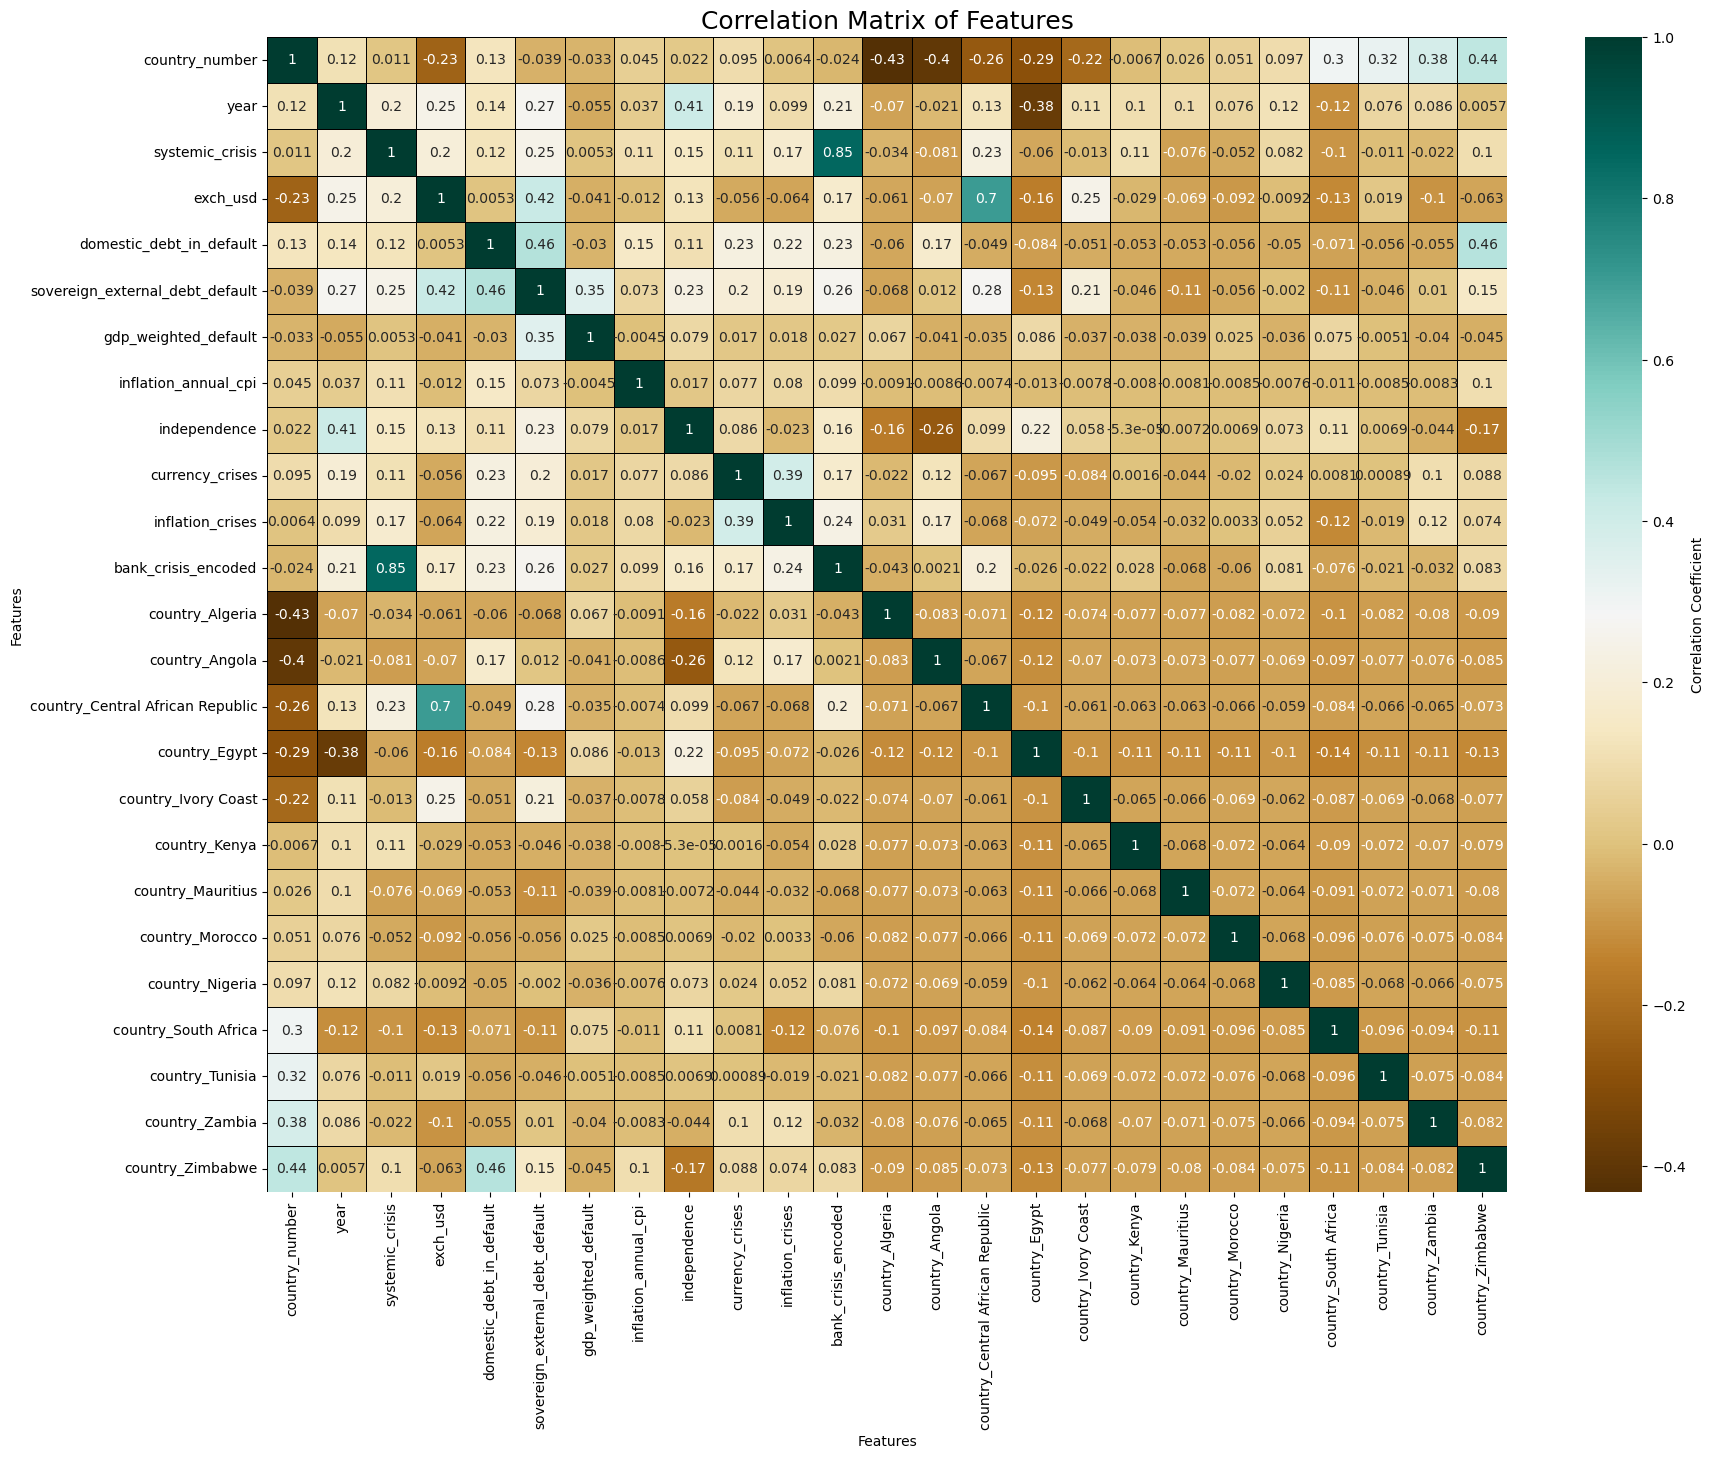

In [37]:
plt.figure(figsize=(20, 15)) 
sns.heatmap(correlation_matrix, 
            annot=True,
            cmap="BrBG",           
            linewidths=0.5,           
            linecolor='black',        
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Matrix of Features', fontsize=18)
plt.xlabel('Features', fontsize=10)
plt.ylabel('Features', fontsize=10)

plt.show()

### Modelling

#### selecting features and splitting the data into training and test sets

In [39]:
#dropping unnecessary columns 
X = df_encoded.drop(columns=["systemic_crisis", "gdp_weighted_default", "country_code", "country_number", "country", "banking_crisis", "country_code"])

#selecting the target variable
y = df_encoded["systemic_crisis"]

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verifying the features
print(X_train.columns)

Index(['year', 'exch_usd', 'domestic_debt_in_default',
       'sovereign_external_debt_default', 'inflation_annual_cpi',
       'independence', 'currency_crises', 'inflation_crises',
       'bank_crisis_encoded', 'country_Algeria', 'country_Angola',
       'country_Central African Republic', 'country_Egypt',
       'country_Ivory Coast', 'country_Kenya', 'country_Mauritius',
       'country_Morocco', 'country_Nigeria', 'country_South Africa',
       'country_Tunisia', 'country_Zambia', 'country_Zimbabwe'],
      dtype='object')


### KNN
#### K-Nearest Neigbour for Classification

In [41]:
from sklearn.neighbors import KNeighborsClassifier as knn

ks = range(1, 10)
mean_accuracy = []

for n in ks:
    knn_model  = knn(n_neighbors = n)
    knn_model.fit(X_train, y_train)
    knn_ypred = knn_model.predict(X_test)
    mean_accuracy.append(accuracy_score(y_test, knn_ypred))

In [43]:
for i in range(0, len(mean_accuracy)):
    print("k = {} has a Score = {} ".format(i+1, mean_accuracy[i]))

k = 1 has a Score = 0.9198113207547169 
k = 2 has a Score = 0.9150943396226415 
k = 3 has a Score = 0.9198113207547169 
k = 4 has a Score = 0.9245283018867925 
k = 5 has a Score = 0.9198113207547169 
k = 6 has a Score = 0.9198113207547169 
k = 7 has a Score = 0.9150943396226415 
k = 8 has a Score = 0.9198113207547169 
k = 9 has a Score = 0.9245283018867925 


Text(0, 0.5, 'Testing Accuracy Values')

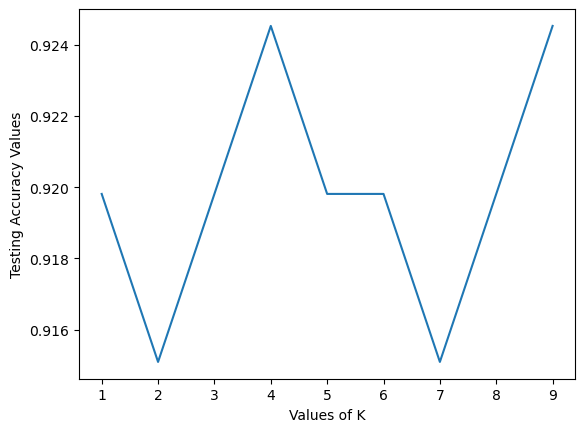

In [45]:
# Relation between k's and their respective accuracies
plt.plot(ks, mean_accuracy)
plt.xlabel('Values of K')
plt.ylabel('Testing Accuracy Values')

In [47]:
# Final Model with best value of k
knn_model = knn(n_neighbors = 4)

In [49]:
#fitting  it into the model
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [51]:
knn_ypred = knn_model.predict(X_test)

In [53]:
# Evaluate the model
# Accuracy
accuracy = accuracy_score(y_test,knn_ypred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
cm = confusion_matrix(y_test, knn_ypred)
print(f"Confusion Matrix:\n{cm}")

# Classification Report (includes precision, recall, and F1-score)
report = classification_report(y_test, knn_ypred)
print(f"Classification Report:\n{report}")

Accuracy: 0.9245283018867925
Confusion Matrix:
[[192   3]
 [ 13   4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       195
           1       0.57      0.24      0.33        17

    accuracy                           0.92       212
   macro avg       0.75      0.61      0.65       212
weighted avg       0.91      0.92      0.91       212



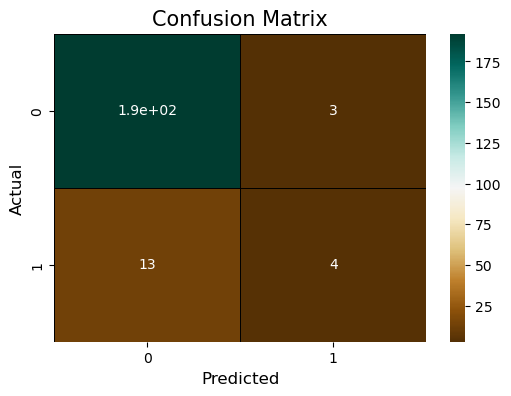

In [55]:
confusion_matrix = pd.crosstab(y_test, knn_ypred, rownames=['Actual'], colnames=['Predicted'])

# Adjusting figure size
plt.figure(figsize=(6, 4))  

sns.heatmap(confusion_matrix, annot=True, cmap="BrBG", linewidths=0.5, linecolor='black')
plt.title('Confusion Matrix', fontsize=15)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

### SVM
Support vector machine classifier

In [58]:
from sklearn.svm import SVC 

In [60]:
from sklearn.metrics import f1_score

In [62]:
kernel_func = ['sigmoid', 'poly', 'rbf', 'linear']
accuracy_score = []

for k in kernel_func:
    svc_model = SVC(C = 0.01, gamma = 'auto', kernel = k)
    svc_model.fit(X_train, y_train)
    svc_ypred = svc_model.predict(X_test)
    accuracy_score.append(f1_score(y_test, svc_ypred, average = 'weighted'))

Text(0, 0.5, 'Accuracy')

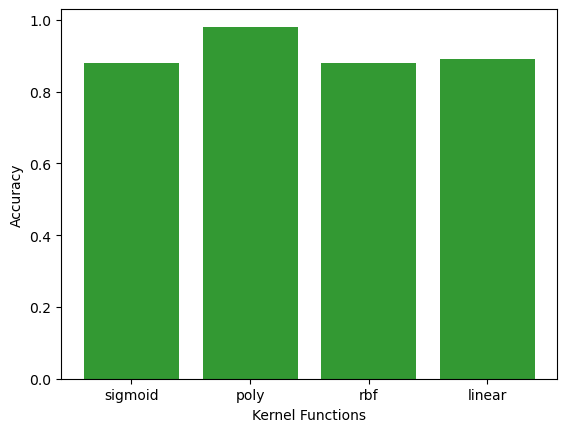

In [63]:
# Visualization of best kernel

y_pos = np.arange(len(kernel_func))
plt.bar(y_pos, accuracy_score, align='center', alpha = 0.8, color='green')
plt.xticks(y_pos, kernel_func)
plt.xlabel('Kernel Functions')
plt.ylabel('Accuracy')

In [66]:
svc_model = SVC(C = 0.01, gamma = 'auto', kernel = 'poly')

In [68]:
svc_model.fit(X_train, y_train)

SVC(C=0.01, gamma='auto', kernel='poly')

In [69]:
svc_ypred = svc_model.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [71]:
# Evaluate the model
# Accuracy
accuracy = accuracy_score(y_test,svc_ypred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
cm = confusion_matrix(y_test, svc_ypred)
print(f"Confusion Matrix:\n{cm}")

# Classification Report (includes precision, recall, and F1-score)
report = classification_report(y_test, svc_ypred)
print(f"Classification Report:\n{report}")

Accuracy: 0.9811320754716981
Confusion Matrix:
[[193   2]
 [  2  15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       195
           1       0.88      0.88      0.88        17

    accuracy                           0.98       212
   macro avg       0.94      0.94      0.94       212
weighted avg       0.98      0.98      0.98       212



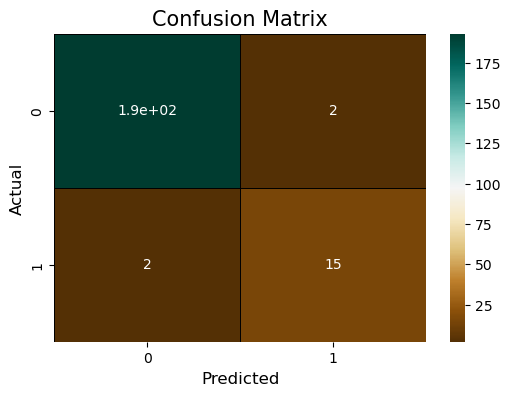

In [76]:
confusion_matrix = pd.crosstab(y_test, svc_ypred, rownames=['Actual'], colnames=['Predicted'])

# Adjusting figure size
plt.figure(figsize=(6, 4))  

sns.heatmap(confusion_matrix, annot=True, cmap="BrBG", linewidths=0.5, linecolor='black')
plt.title('Confusion Matrix', fontsize=15)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

### Decision Tree

In [79]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import jaccard_score

In [81]:
depth_range = range(1, 10)
jaccard_score_ = []
f1_score_ = []

for d in depth_range:
    dt = DecisionTreeClassifier(criterion = 'gini', max_depth = d)
    dt.fit(X_train, y_train)
    dt_ypred = dt.predict(X_test)
    jaccard_score_.append(jaccard_score(y_test, dt_ypred))
    f1_score_.append(f1_score(y_test, dt_ypred, average = 'weighted'))

In [83]:
# Creating a df to check the best value of max_depth

result = pd.DataFrame([jaccard_score_, f1_score_], index = ['Jaccard', 'F1'], columns = ['d = 1','d = 2','d = 3','d = 4','d = 5','d = 6','d = 7','d = 8','d = 9'])
result.columns.name = 'Evaluation Metrices'
result

Evaluation Metrices,d = 1,d = 2,d = 3,d = 4,d = 5,d = 6,d = 7,d = 8,d = 9
Jaccard,0.842105,0.941176,0.833333,0.894737,0.894737,0.894737,0.842105,0.894737,0.894737
F1,0.986033,0.995218,0.985653,0.990804,0.990804,0.990804,0.986033,0.990804,0.990804


In [85]:
# Main Model
dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 2)

In [87]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [89]:
dt_ypred = dt_model.predict(X_test)

In [91]:
# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
accuracy = accuracy_score(y_test,dt_ypred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
cm = confusion_matrix(y_test, dt_ypred)
print(f"Confusion Matrix:\n{cm}")

# Classification Report (includes precision, recall, and F1-score)
report = classification_report(y_test, dt_ypred)
print(f"Classification Report:\n{report}")

Accuracy: 0.9952830188679245
Confusion Matrix:
[[195   0]
 [  1  16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       195
           1       1.00      0.94      0.97        17

    accuracy                           1.00       212
   macro avg       1.00      0.97      0.98       212
weighted avg       1.00      1.00      1.00       212



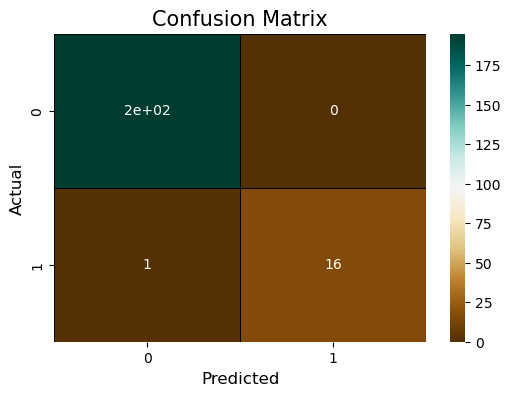

In [93]:
confusion_matrix = pd.crosstab(y_test, dt_ypred, rownames=['Actual'], colnames=['Predicted'])

# Adjusting figure size
plt.figure(figsize=(6, 4))  

sns.heatmap(confusion_matrix, annot=True, cmap="BrBG", linewidths=0.5, linecolor='black')
plt.title('Confusion Matrix', fontsize=15)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()